In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_start = pd.read_csv("vitrina.csv")
df = df_start.loc[:, ['Кол-во чеков', 'Source_Колл-центр', 'Source_Сайт', 'Source_Терминал', 'Средняя сумма в чеке', 'PaymentType_Безналичная',
       'PaymentType_Кредит в магазине', 'PaymentType_Наличные']]

In [ ]:
df_start.columns

Index(['Phone_new', 'Кол-во чеков', 'OrderDate', 'Quant', 'RowDiscount',
       'Общая сумма чеков', 'Source_Колл-центр', 'Source_Онлайн-Резерв.',
       'Source_Сайт', 'Source_Терминал', 'PaymentType_Безналичная',
       'PaymentType_Кредит в магазине', 'PaymentType_Наличные', 'Area_ДФО',
       'Area_ПФО', 'Area_СЗФО', 'Area_СФО', 'Area_УФО', 'Area_ЦФО', 'Area_ЮФО',
       'TN_Автотовары', 'TN_Аксессуары', 'TN_Детские товары',
       'TN_Игры, софт и развлечения', 'TN_Климат',
       'TN_Крупная бытовая техника', 'TN_Мебель', 'TN_Мелкая бытовая техника',
       'TN_Сделай сам', 'TN_Спорт и активный отдых', 'TN_ТВ-Аудио',
       'TN_Товары для дома', 'TN_Цифровая Техника',
       'Среднее кол-во товаров в чеке', 'Средняя сумма в чеке'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

In [ ]:
db_scores = []
for K in range(2, 20):
    model = KMeans(n_clusters=K, n_init=10, random_state=42)
    cluster_assignments = model.fit_predict(scaled)
    db_score = davies_bouldin_score(scaled, cluster_assignments)
    db_scores.append(db_score)

In [ ]:
calinski_scores = []
for K in range(2, 20):
    model = KMeans(n_clusters=K, n_init=10, random_state=42)
    cluster_assignments = model.fit_predict(scaled)
    calinski_score = calinski_harabasz_score(scaled, cluster_assignments)
    calinski_scores.append(calinski_score)

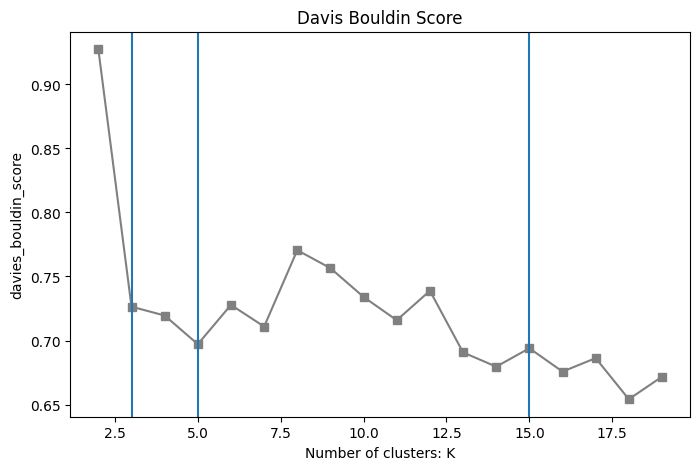

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), db_scores, marker='s', color='gray', label='Davis_Boudin')
plt.axvline(3)
plt.axvline(5)
plt.axvline(15)
plt.xlabel("Number of clusters: K")
plt.ylabel('davies_bouldin_score')
plt.title("Davis Bouldin Score")
plt.show()

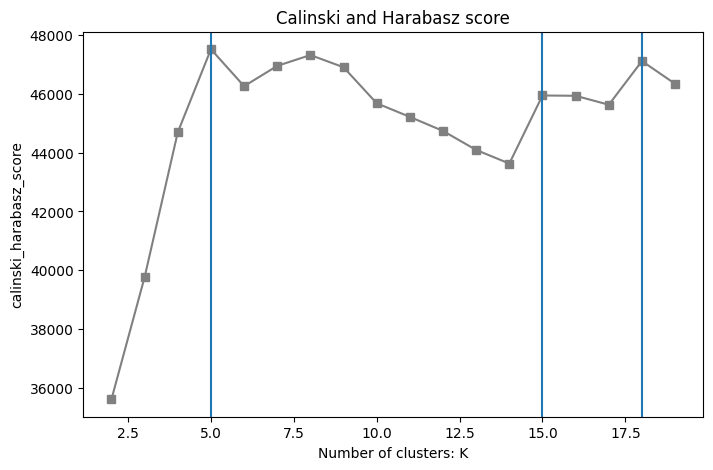

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), calinski_scores, marker='s', color='gray')
plt.axvline(5)
plt.axvline(15)
plt.axvline(18)
plt.xlabel("Number of clusters: K")
plt.ylabel('calinski_harabasz_score')
plt.title("Calinski and Harabasz score")
plt.show()